# CUSTOMER CHURN PROBLEM

# BUSINESS PROBLEM
Business problem is very simple, There is a wireless telecom company who wants to retain their existing customers who may churn, for that they have to know which existing customers has the highest probability of leaving the company.



# Data

We have 7043 rows with 20 features and 1 target variable, Every row tells us different customer details and whether they churned or not after 2 months of observation.

# Machine Learning Problem

So Converting a Business problem to a Machine Learning problem,
This seems to be a simple binary classification problem in which we have 2 classes, "yes" and "no".

We have some numerical features, some categorical features.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
import pandas as pd
df=pd.read_csv("cd.csv")
df['TechSupport'].describe()

count     7043
unique       3
top         No
freq      3473
Name: TechSupport, dtype: object

### Understanding the data and manipulation

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
print(display(df))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


None
None


In [5]:
print('Number of data points : ', df.shape[0])
print('Number of features : ', df.shape[1])
print('Features : ', df.columns.values)

Number of data points :  7043
Number of features :  21
Features :  ['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']
Number of data points :  7043
Number of features :  21
Features :  ['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [6]:
# checking the missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Observation

It seems there is no missing values



In [7]:
#checking the duplicates values
duplicate = df[df.duplicated()]
duplicate.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


# Observation

No duplicates

In [8]:
df['Churn'].value_counts() #getiing the number of values

No     5174
Yes    1869
Name: Churn, dtype: int64

No     5174
Yes    1869
Name: Churn, dtype: int64

# Imbalanced data

It seems that data is imbalanced, as number of "yes" is 1869 and number of "no" is 5174, we will balanced the data with upsampling

## Exploratory data analysis/ Data Visualization

This will include-
1. univariate analysis(histograms/bar plots/ pdf/cdf/box plots/violin plots)
2. bivariate analysis(scatter plots and pair plots)

There are 20 features so we also need to see which features are not at all helping in classification.
we surely know that customerID is of no use

Male      3555
Female    3488
Name: gender, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64


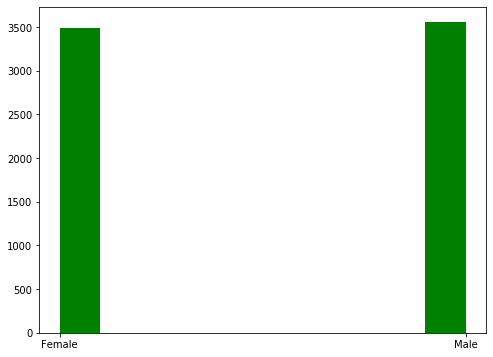

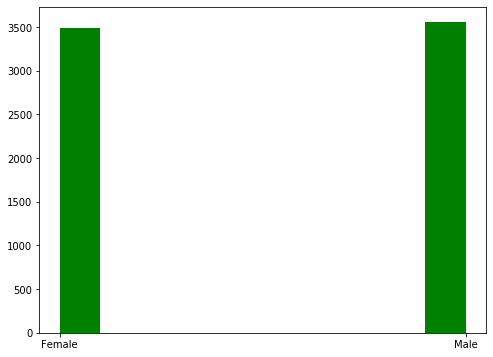

In [9]:
#lets see variable one by one
#gender 
#univariate analysis
#gender #gender has only two values, male and female
gender_count=df['gender'].value_counts()
print(gender_count)

plt.figure(figsize=(8,6))
plt.hist(df['gender'],facecolor='g')
plt.show()

There is no such difference in number of male and number of female

In [6]:
#now lets see how gender is affecting our target variable "churn"
df1=df.replace({'Churn': {'Yes': 1, 'No': 0}})
df1[['gender', 'Churn']].groupby('gender').mean()


,Churn
gender,
Female,0.269209
Male,0.261603


,Churn
gender,
Female,0.269209
Male,0.261603


Mean values are aprroximately same that mean it is not contributing as much to 
pretict churning so we wont take gender as a feature value

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


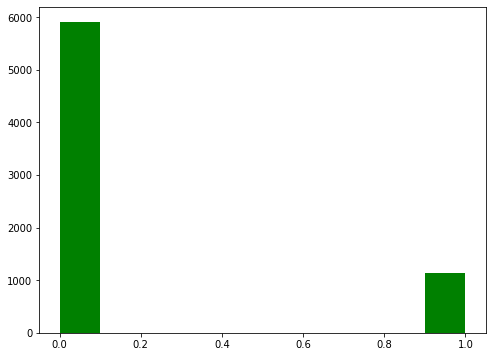

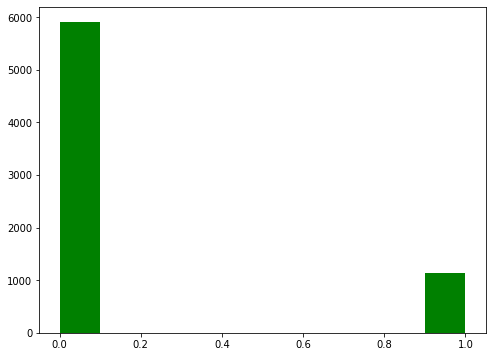

                  Churn
SeniorCitizen          
0              0.236062
1              0.416813
                  Churn
SeniorCitizen          
0              0.236062
1              0.416813


In [11]:
#second variable is SENIORCITIZEN

count=df['SeniorCitizen'].value_counts()
print(count)

plt.figure(figsize=(8,6))
plt.hist(df['SeniorCitizen'],facecolor='g')
plt.show()


print(df1[['SeniorCitizen', 'Churn']].groupby('SeniorCitizen').mean())




Most of the people are not senior citizen, but for people who are not seniorcitizen, mean is 0.23 and for senior citizen mean is 0.41, means young people tend to stay longer with the company then senior people.
Could be a good feature.

In [1]:
#third variable is partner

count=df['Partner'].value_counts()
print(count)


plt.figure(figsize=(8,6))
plt.hist(df['Partner'],facecolor='g')
plt.show()

df1[['Partner', 'Churn']].groupby('Partner').sum()



NameError: name 'df' is not defined

Partner feature is not clear as such from the data, i am assuming that partner 
means if the person is single or married.
 
Now There is not much difference in numbers between people who are married and 
who are not but people who does not have partners(single) tend to churn more than people who are married.

No     4933
Yes    2110
Name: Dependents, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64


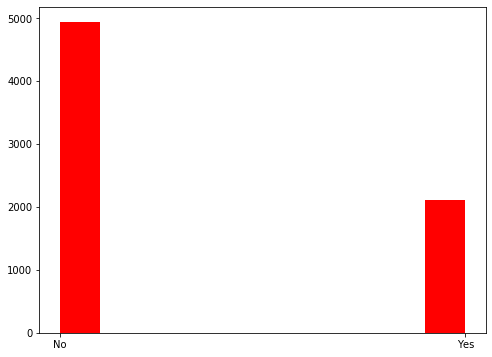

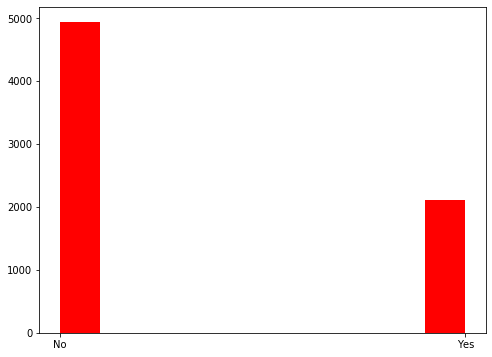

,Churn
Dependents,
No,0.312791
Yes,0.154502


,Churn
Dependents,
No,0.312791
Yes,0.154502


In [13]:
#4th variable is dependents
count=df['Dependents'].value_counts()
print(count)


plt.figure(figsize=(8,6))
plt.hist(df['Dependents'],facecolor='r')
plt.show()

df1[['Dependents', 'Churn']].groupby('Dependents').mean()



Again this feature is not clear, i am not sure what is dependents.
but it could be useful as there is a difference iin mean values.

32.37114865824223
29.0
32.37114865824223
29.0
29.0
15.0
61.0
29.0
15.0
61.0


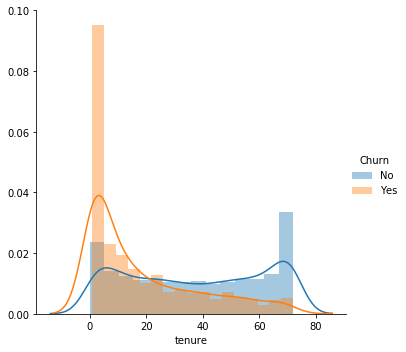

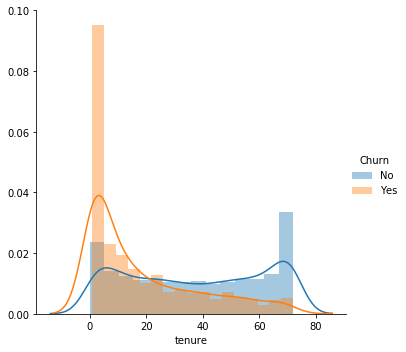

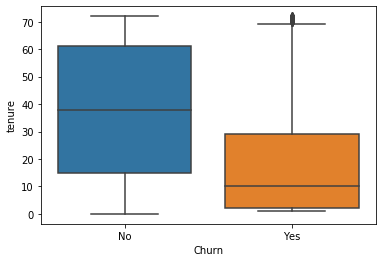

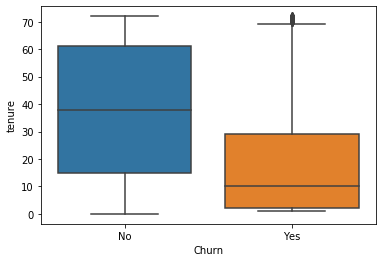

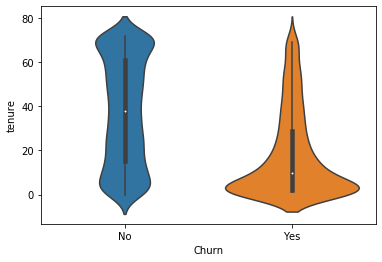

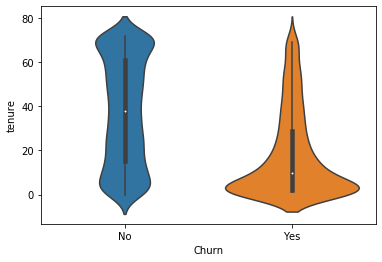

In [14]:
#4th feature is tenure, its for a change a continous variable

a=np.mean(df1.tenure)
print(a)
b=np.median(df1.tenure)
print(b)

sa=df.loc[df['Churn']=='Yes']
sb=df.loc[df['Churn']=='No']

c=np.percentile(sa['tenure'],75)
print(c)

d=np.percentile(sb['tenure'],25)
print(d)

e=np.percentile(sb['tenure'],75)
print(e)

sns.FacetGrid(df, hue="Churn", size=5) \
   .map(sns.distplot, "tenure",kde='True') \
   .add_legend()
plt.show()

sns.boxplot(x='Churn',y='tenure', data=df)
plt.show()

sns.violinplot(x='Churn',y='tenure', data=df)

Tenure is a continous variable, so in first plot we can the pdf for both yes and no are highly overlapping, so it is very difficult to see but we can say that for lower values of tenure number of people who churn are more, for higher values of tenure people who churn are less

In second plot, i plot the box plot, which tells us 25th percentile, 50th percentile, 75th percentile and tell us if there are outliers in the data.
 
  1. 25 percent of the total people who did not churn have tenure less than 20.
  
  2. we can easily say that  75% of the total people who churn from the company 
     had a tenure less than 29.
    
  3. 50% of the people who stayed with the company have tenure in between 15 to      61, this information could be great for the company who wants to give          incentive.

Yes    6361
No      682
Name: PhoneService, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64


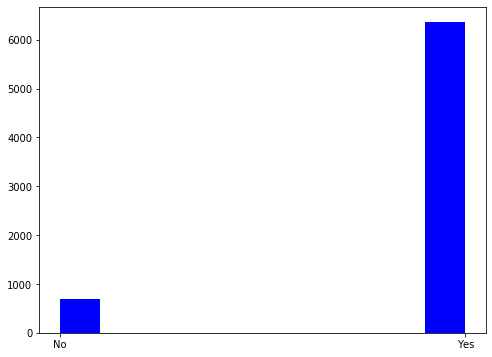

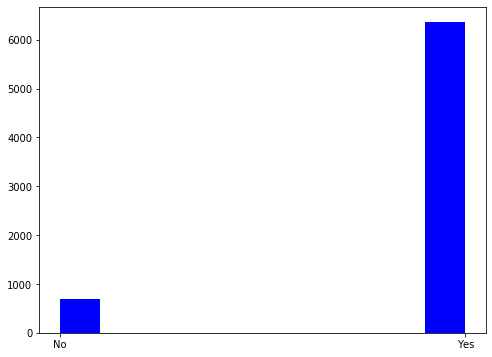

,Churn
PhoneService,
No,0.249267
Yes,0.267096


,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [15]:
#5th variable is phoneservice
count=df['PhoneService'].value_counts()
print(count)


plt.figure(figsize=(8,6))
plt.hist(df['PhoneService'],facecolor='b')
plt.show()

df1[['PhoneService', 'Churn']].groupby('PhoneService').mean()


Not much differnce in mean, leaving the feature.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


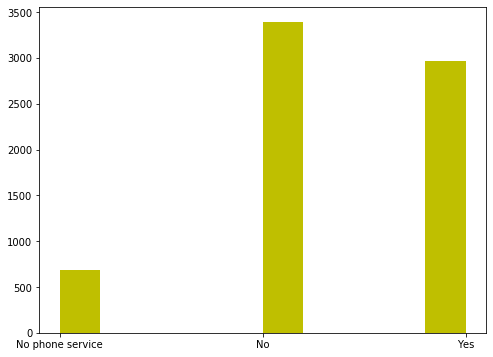

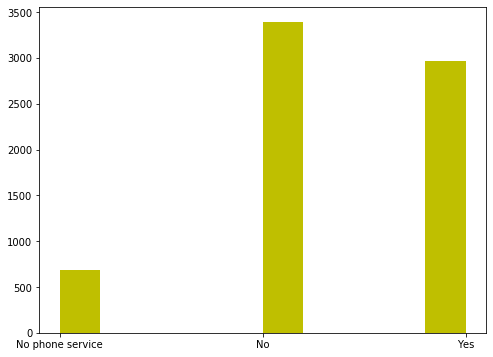

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


In [16]:
#6th variable is MultipleLines
count=df['MultipleLines'].value_counts()
print(count)


plt.figure(figsize=(8,6))
plt.hist(df['MultipleLines'],facecolor='y')
plt.show()

df1[['MultipleLines', 'Churn']].groupby('MultipleLines').mean()


Means are similar but i am not leaving this feature.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


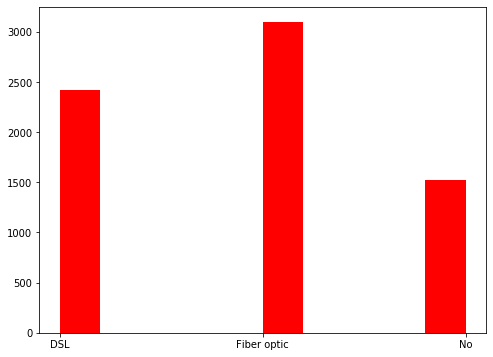

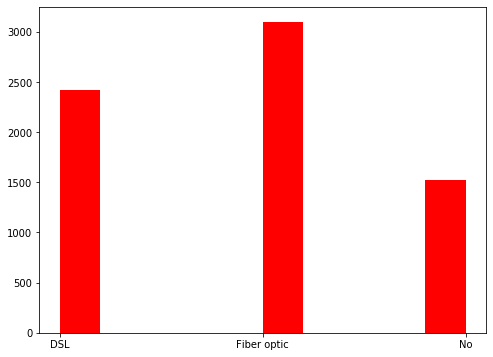

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [17]:
#7th feature is InternetService

count=df['InternetService'].value_counts()
print(count)

plt.figure(figsize=(8,6))
plt.hist(df['InternetService'],facecolor='r')
plt.show()

df1[['InternetService', 'Churn']].groupby('InternetService').mean()



Internet service is definitely a good feature to predict churn, but with internet services many other features are also related.
Like i think monthly charges, total charges, StreamingMovies, OnlineSecurity  ,OnlineBackup,StreamingTV,StreamingMovies ,Contract ,PaperlessBilling.    


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


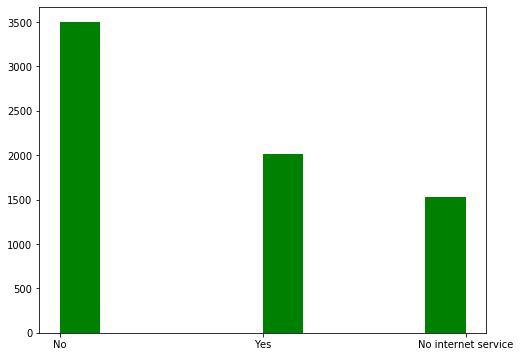

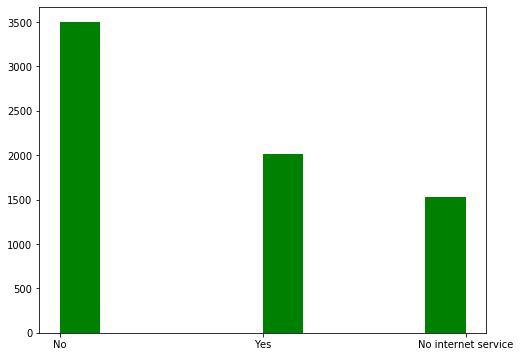

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [18]:
#8 online service
count=df['OnlineSecurity'].value_counts()
print(count)


plt.figure(figsize=(8,6))
plt.hist(df['OnlineSecurity'],facecolor='g')
plt.show()

df1[['OnlineSecurity', 'Churn']].groupby('OnlineSecurity').mean()




can be effective in predciting.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


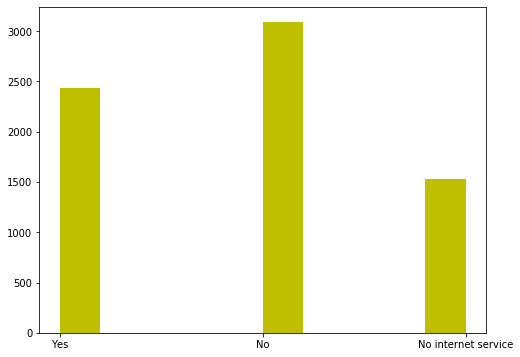

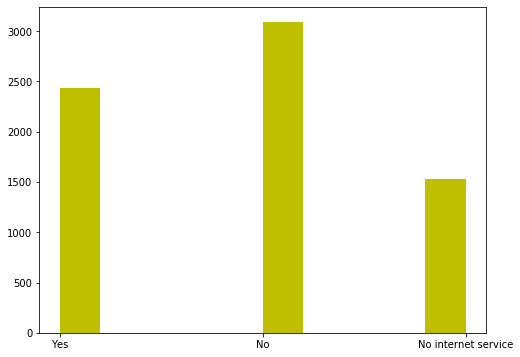

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [19]:
#9 online service
count=df['OnlineBackup'].value_counts()
print(count)


plt.figure(figsize=(8,6))
plt.hist(df['OnlineBackup'],facecolor='y')
plt.show()

df1[['OnlineBackup', 'Churn']].groupby('OnlineBackup').mean()



can be a good feature

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


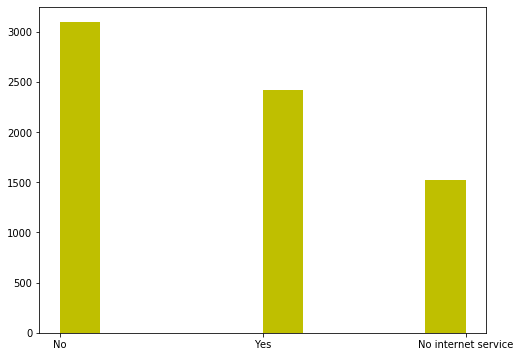

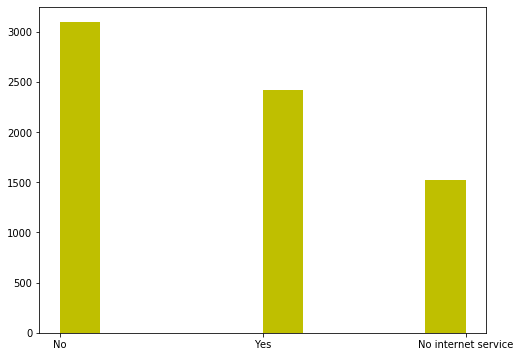

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [20]:
#10 device protection

#9 online service
count=df['DeviceProtection'].value_counts()
print(count)


plt.figure(figsize=(8,6))
plt.hist(df['DeviceProtection'],facecolor='y')
plt.show()

df1[['DeviceProtection', 'Churn']].groupby('DeviceProtection').mean()



This can also be a good feature

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


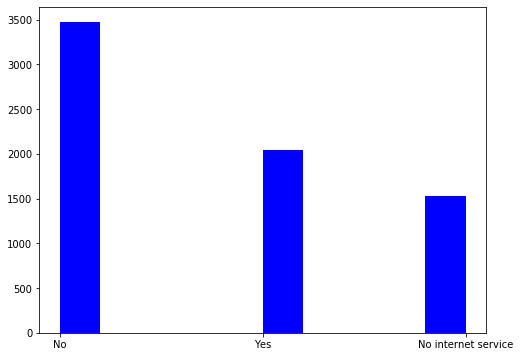

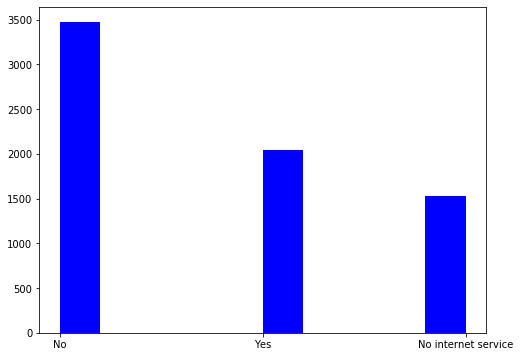

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


In [21]:
# 11 TechSupport
count=df['TechSupport'].value_counts()
print(count)


plt.figure(figsize=(8,6))
plt.hist(df['TechSupport'],facecolor='b')
plt.show()

df1[['TechSupport', 'Churn']].groupby('TechSupport').mean()



This can be a good feature

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


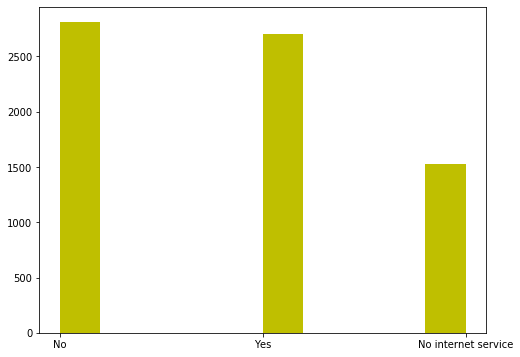

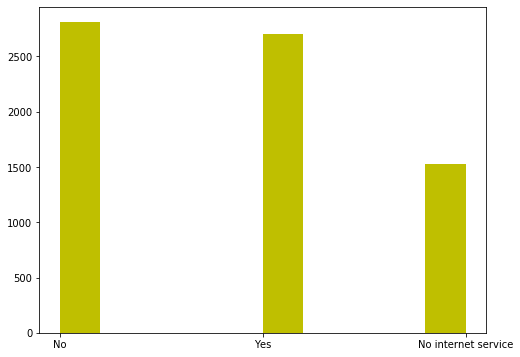

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [22]:
#12 StreamingTV
count=df['StreamingTV'].value_counts()
print(count)


plt.figure(figsize=(8,6))
plt.hist(df['StreamingTV'],facecolor='y')
plt.show()

df1[['StreamingTV', 'Churn']].groupby('StreamingTV').mean()


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


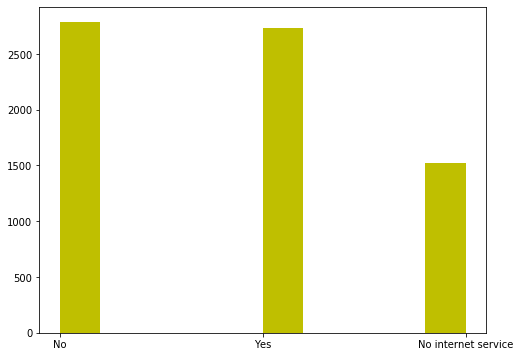

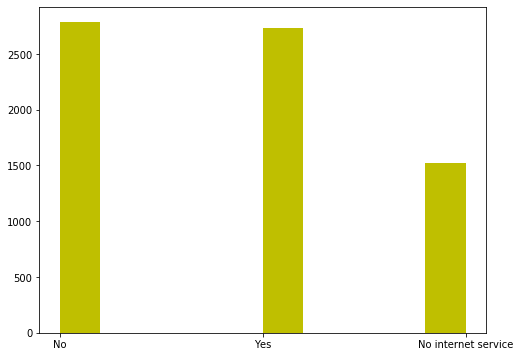

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [23]:
#13 StreamingMovies
count=df['StreamingMovies'].value_counts()
print(count)


plt.figure(figsize=(8,6))
plt.hist(df['StreamingMovies'],facecolor='y')
plt.show()

df1[['StreamingMovies', 'Churn']].groupby('StreamingMovies').mean()


StreamingTV and StreamingMovies are looking almost same so i believe they are 
correlated so i am just taking StreamingTV as a feature

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


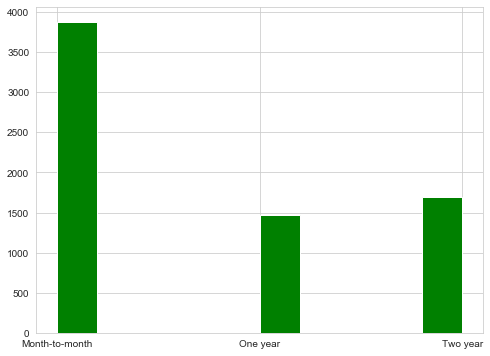

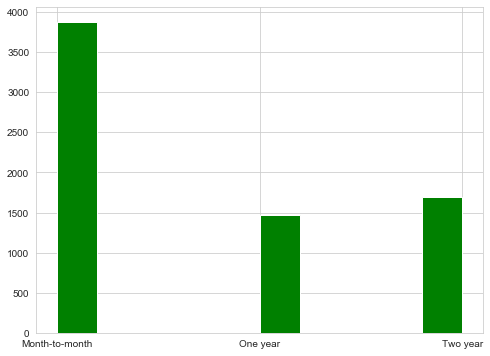

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


In [11]:
#14 CONTRACT AS A FEATURE
count=df['Contract'].value_counts()
print(count)


plt.figure(figsize=(8,6))
plt.hist(df['Contract'],facecolor='g')
plt.show()

df1[['Contract', 'Churn']].groupby('Contract').mean()


Now above feature column state that monthy customers tend to churn more than yearly or two yearly customers.
Now this column could be a problem as we do not have the date and timing of starting of the contract as we have only 2 months observation and if customer opted the service in that 2 months then it is highly unlikely then he will churn because he might opted for full payment and comapny does not wnt to give 
incentives to those customers.

For clarity i will not include contract as a feature because date and timings are not mentioned in the data.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


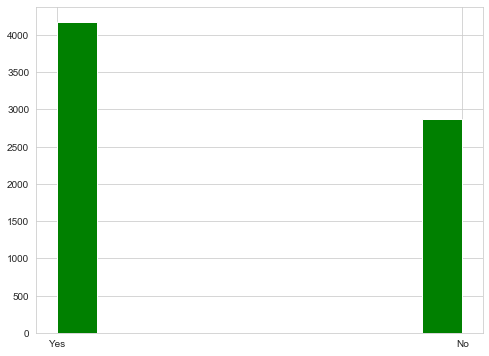

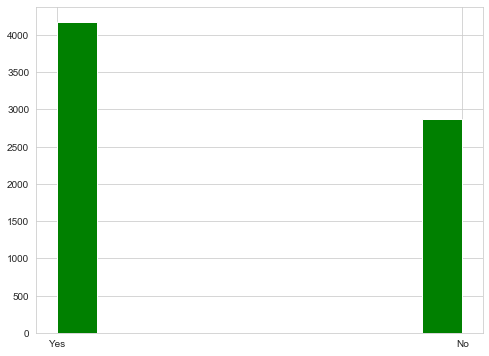

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


In [10]:
#15PaperlessBilling as a feature
count=df['PaperlessBilling'].value_counts()
print(count)


plt.figure(figsize=(8,6))
plt.hist(df['PaperlessBilling'],facecolor='g')
plt.show()

df1[['PaperlessBilling', 'Churn']].groupby('PaperlessBilling').mean()



This can be a good feature


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


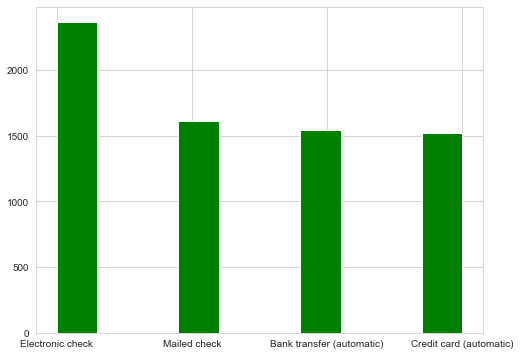

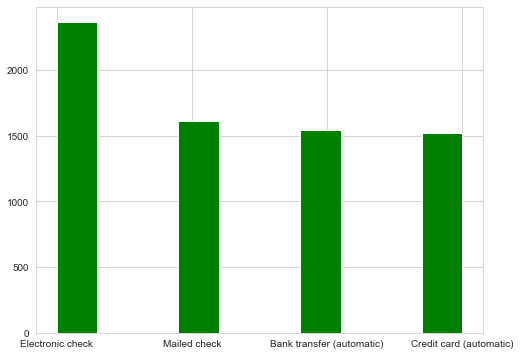

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


In [9]:
#16 PaymentMethod
count=df['PaymentMethod'].value_counts()
print(count)


plt.figure(figsize=(8,6))
plt.hist(df['PaymentMethod'],facecolor='g')
plt.show()

df1[['PaymentMethod', 'Churn']].groupby('PaymentMethod').mean()



Simply means people who uses payment method which involved electronic check
tend to more churn, this might be corrrelated with senior citizen feature as young people does not use electronic check very often these days.

64.76169246059922
70.35
64.76169246059922
70.35
94.2
56.15
25.1
88.4
94.2
56.15
25.1
88.4


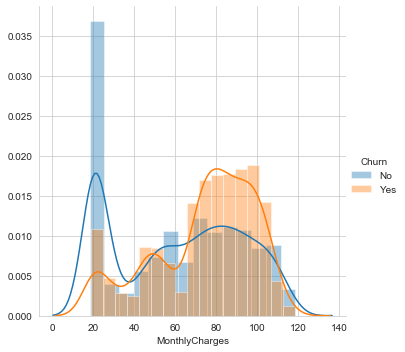

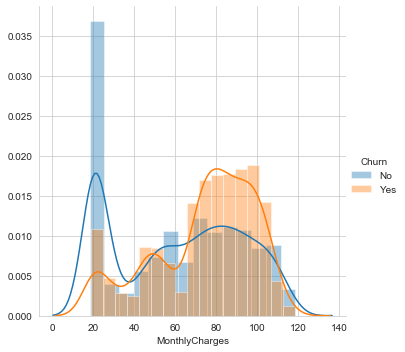

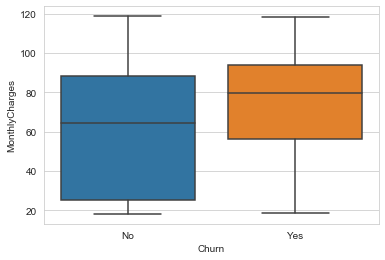

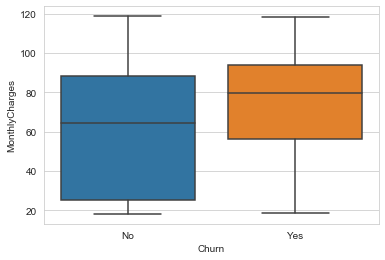

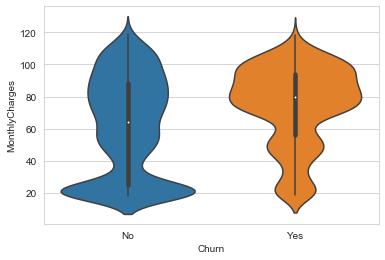

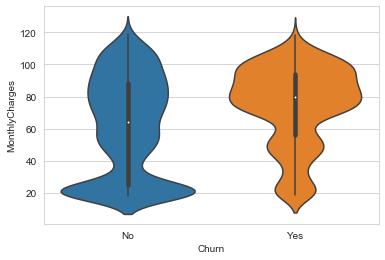

In [8]:
#17monthly charges, a numerical feature

a=np.mean(df1.MonthlyCharges)
print(a)
b=np.median(df1.MonthlyCharges)
print(b)

sa=df.loc[df['Churn']=='Yes']
sb=df.loc[df['Churn']=='No']

c=np.percentile(sa['MonthlyCharges'],75)
print(c)

n=np.percentile(sa['MonthlyCharges'],25)
print(n)

d=np.percentile(sb['MonthlyCharges'],25)
print(d)

e=np.percentile(sb['MonthlyCharges'],75)
print(e)

sns.FacetGrid(df, hue="Churn", size=5) \
   .map(sns.distplot, "MonthlyCharges",kde='True') \
   .add_legend()
plt.show()

sns.boxplot(x='Churn',y='MonthlyCharges', data=df)
plt.show()

sns.violinplot(x='Churn', y='MonthlyCharges', data=df)

1. first plot is simple pdf, and by pdfs we can clearly observe the overlapping    between the two classes so it is very difficult to clearly classigy from 
   this feature, but it is clear that low monthly charges customer do not churn
   as monthly charges increases customers churn increases.
   
2. second plot is box plot, which says that for monthly charges less than 88,      75% of the customers stayed and did not churn.

3. customers who are not leaving/did not churn have interquantile range = 25 to    88 or 50% of the people who did not left pay between 25 to 88.

4. customers who churn have interquantile range between 56 to 94, only 25%
   of people from people who churn are those who were paying less than 56, and 
   that is a important factor.
   
5. last plot is of violin plot(combination of box plot and pdf's)

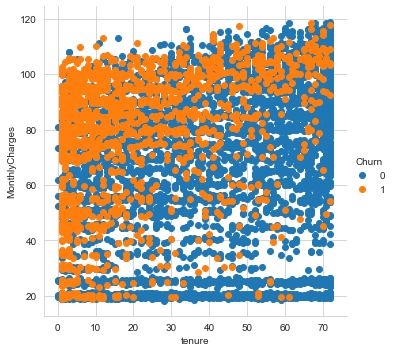

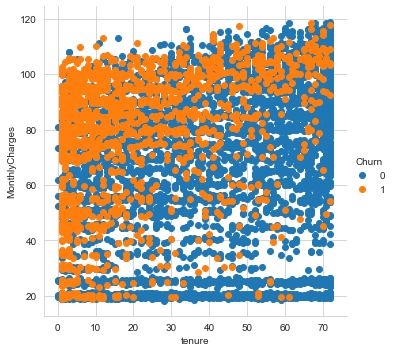

In [7]:
#Lets plot the scatter plot between monthly charges and tenure
#BIVARIATE ANALYSIS

sns.set_style("whitegrid");
sns.FacetGrid(df1, hue="Churn", size=5) \
   .map(plt.scatter, "tenure", "MonthlyCharges") \
   .add_legend();
plt.show()

# observation

1. we can see if we ignore some data points, 
   In tenure after 10 to tenure 70 and MonthlyCharges from 20 to 60, churning 
   did not happen
2. In Tenure 50 to 70, and in MonthlyCharges from 20 to 90, churning did not      happen.
3. In Tenure 0 to 20, and montly chargesfrom 50 to 110, high churning happened.
4. In Tenure 0 to 5, again lots of churning happened irrespective of monthly      charges
5. After monthly charges 90, again lot of churning happened but as tenure is      incrreasing we see there is a drop in churning even after high monthly          charges.

# Conclusion of Data Analysis

We see all the variables in detail and found some features like tenure, MontlyCharges to be very useful and some like CustomerID, Gender, TotalCharges(which is just tenure*MontlyCharges), Partner are not at all useful.
We will remove features which do not add any value to the churning.

In [13]:
#Removing non-useful features

data=df1.drop(['customerID','gender','PhoneService','TotalCharges'],axis=1)

In [14]:
data.shape

(7043, 17)

(7043, 17)

In [15]:
target=data['Churn']
target.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# DATA PREPROCESSING

 1.In this we will label the data, scale the numerical features because some      algorithms like logistic regression works good when standardized.
 
 2.We will also balance the data if neccessary

In [16]:
categorical = ['SeniorCitizen', 'Partner', 'Dependents',
'MultipleLines', 'InternetService','OnlineSecurity',  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Contract']
X = pd.get_dummies(data, columns=categorical, drop_first=True)

In [17]:
scaling = MinMaxScaler()
ten = scaling.fit_transform(df[['tenure']])
mc = scaling.fit_transform(df[['MonthlyCharges']])
X['tenure'] = ten
X['MonthlyCharges'] = mc


In [18]:
X.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,0.013889,0.115423,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.027778,0.354229,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.625000,0.239303,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.027778,0.521891,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,0.013889,0.115423,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.027778,0.354229,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.625000,0.239303,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.027778,0.521891,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [19]:
X.columns

Index(['tenure', 'MonthlyCharges', 'Churn', 'SeniorCitizen_1', 'Partner_Yes',
       'Dependents_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

Index(['tenure', 'MonthlyCharges', 'Churn', 'SeniorCitizen_1', 'Partner_Yes',
       'Dependents_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   float64
 1   MonthlyCharges                         7043 non-null   float64
 2   Churn                                  7043 non-null   int64  
 3   SeniorCitizen_1                        7043 non-null   uint8  
 4   Partner_Yes                            7043 non-null   uint8  
 5   Dependents_Yes                         7043 non-null   uint8  
 6   MultipleLines_No phone service         7043 non-null   uint8  
 7   MultipleLines_Yes                      7043 non-null   uint8  
 8   InternetService_Fiber optic            7043 non-null   uint8  
 9   InternetService_No                     7043 non-null   uint8  
 10  OnlineSecurity_No internet service     7043 non-null   uint8  
 11  Onli

In [3]:
#lets check whether data is balanced or imbalanced
import seaborn as sns
sns.countplot('Churn', data=X)
plt.show()
#to be exact, lets find out the number

data['Churn'].value_counts()

NameError: name 'X' is not defined

There is a definitely a imbalance of data, We need to address this problem before moving further.

In [22]:
#upsampling of data

no_churn=X[X['Churn']==0]
yes_churn=X[X['Churn']==1]
upsampled = yes_churn.sample(n=len(no_churn), replace=True)
X1 = no_churn.append(upsampled).reset_index(drop=True)
print(upsampled.shape)
X1.shape

X1.head()

(5174, 28)
(5174, 28)


,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,0.013889,0.115423,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.625000,0.239303,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.305556,0.704975,0,0,0,1,0,1,1,0,...,0,1,0,0,1,1,0,0,0,0
4,0.138889,0.114428,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,0.013889,0.115423,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.625000,0.239303,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.305556,0.704975,0,0,0,1,0,1,1,0,...,0,1,0,0,1,1,0,0,0,0
4,0.138889,0.114428,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


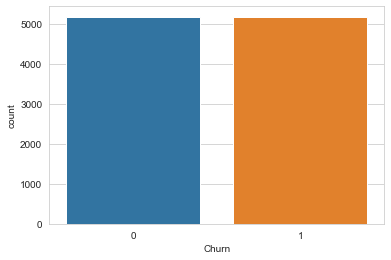

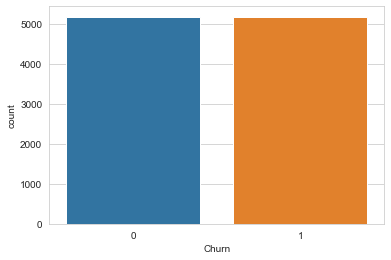

In [23]:
sns.countplot('Churn', data=X1)
plt.show()


Data becomes balanced now.

# MODEL TRAINING

Since we have a binary classification problem, we have some algorithms which we can try and see what works best.

Logistic Regression-
1. Works fairly well on binary classification problem, In Logistic regression we minimize (Logloss and Regularization term) and find the w(weight) vector which minimizes the sum of (logloss and regularization term) over all the data points.

2. Assumption of LR assumption is that we assume classes in logistic regression are linearly seperable.

3. Train time complexity at training time- o(n*d), n is number of data points, d is number of features/dimensions.

4. Run time complexity at run time- o(d), d is the number of features/dimensions.

In [ ]:
x2=X1.drop('Churn',axis=1)

y2=X1['Churn']

In [4]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

tuned_parameters=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=50)

model=GridSearchCV(LogisticRegression(),tuned_parameters,scoring='accuracy')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))


KeyboardInterrupt



In [ ]:
#using F1 SCORE 
model=GridSearchCV(LogisticRegression(),tuned_parameters,scoring='f1')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))

LOGISTIC REGRESSION is not giving us the good accurace or F1 score, lets move to other algorithms

SVM(####add info about svm)



In [ ]:
from sklearn import svm

tuned_parameters=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=50)
svc=svm.SVC()
tuned_parameters2={'kernel': ('linear','rbf'),'C':[10**-4,10**-2,10**0,10**2,10**4]}
model=GridSearchCV(svc,tuned_parameters2,scoring='accuracy')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))


we got accuracy of 81.8% with svm, using rbf kernel.

In [ ]:
#LETS USE RANDOM FOREST 

In [24]:
print("hello")

hello
hello
